In [81]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import tensorflow as tf

np.random.seed(12)
tf.random.set_seed(12)

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed, Reshape
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [82]:
import DataStore

ds = DataStore.DataStore("data", 100)

In [70]:
ds.trainData['A-3'].shuffle()
len(ds.trainData['A-3'].x)

2636

In [83]:
X_train = ds.trainData['A-3'].x
Y_train = ds.trainData['A-3'].y

In [88]:
X_train.shape[0]

2636

In [85]:
Y_train = Y_train.reshape(2636,1,25)

In [86]:
model = Sequential()
model.add(LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 256)               288768    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 repeat_vector_4 (RepeatVect  (None, 100, 256)         0         
 or)                                                             
                                                                 
 lstm_9 (LSTM)               (None, 100, 256)          525312    
                                                                 
 dropout_9 (Dropout)         (None, 100, 256)          0         
                                                                 
 time_distributed_4 (TimeDis  (None, 100, 25)          6425      
 tributed)                                            

In [87]:
history = model.fit(X_train, Y_train, epochs=25, batch_size=1, validation_split=0.2,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=25, mode='min')], shuffle=False)

Epoch 1/25
2095/2108 [============================>.] - ETA: 1s - loss: 0.0341

KeyboardInterrupt: 

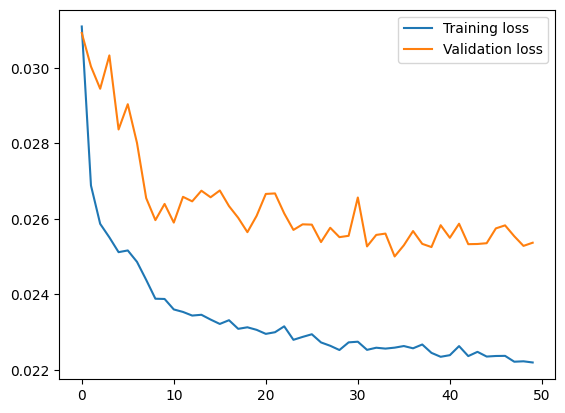

In [80]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

In [63]:
model.save("models/experimental/A-3.h5")

In [64]:
!pwd

/Users/juanrodriguez/PycharmProjects/pythonProject1/Seq2SeqAnom


In [65]:
Y_train.shape

(2735, 1, 25)

In [66]:
yhat = model.predict(X_train, verbose=1)

86/86 [==============================] - 1s 3ms/step


In [67]:
yhat.shape

(2735, 1, 25)

In [68]:
np.abs(yhat[0] - Y_train[0]).mean()

0.0015166090280854761

In [43]:
Y_train[:,0]

array([ 0.32871188,  0.11793881, -0.54924163, ..., -0.33298171,
       -0.54924163,  0.76934069])

In [44]:
yhat[:,

array([[ 3.77405971e-01,  2.47159449e-04,  4.70437168e-04, ...,
        -2.33013707e-05,  1.36884366e-04, -5.78343170e-05],
       [-1.12778232e-01,  9.86655243e-04,  4.59915784e-04, ...,
        -1.97277623e-04,  1.69176274e-04, -7.13033660e-04],
       [-5.23139119e-01, -1.76251691e-04,  2.70341500e-03, ...,
        -2.35557696e-03,  2.95826438e-04, -1.13910087e-03],
       ...,
       [-5.02665520e-01,  1.55767589e-03,  3.65889806e-04, ...,
        -3.95552692e-04,  2.05642806e-04, -1.19973999e-03],
       [-5.00286341e-01,  1.55437726e-03,  3.67176835e-04, ...,
        -3.93865368e-04,  2.05510703e-04, -1.19715626e-03],
       [ 7.92385817e-01, -3.86805914e-04,  4.25845850e-04, ...,
         1.19437755e-04,  1.61034404e-04,  5.39093162e-04]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.plot(ds.trainData['A-1'].y[81])

In [ ]:
import pandas as pd
import os

In [ ]:
lbls = pd.read_csv(os.path.join("data", "labeled_anomalies.csv"))

In [ ]:
labels_dict = {}
for rw in lbls.iterrows():
    labels_dict[rw[1]['chan_id']] = str2ary(rw[1]['anomaly_sequences'])

In [ ]:
def str2ary(str_):
    x = str_.replace("]","").replace("[","")
    x = x.split(",")
    assert(not len(x)%2)
    lst = []
    for i in range(0, len(x), 2):
        tmp  = range(int(x[i]), int(x[i+1]))
        lst.append(tmp)
    return lst

In [18]:
s = np.array([[1,2,3,4], [5,6,7,8]])
s.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
2155 in rs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [ ]:
def generate_data(seed=17):
    # Fix the seed to reproduce the results
    rand = np.random.RandomState(seed)
    x = []
    dat = rand.lognormal(0, 0.3, 1000)
    x = np.concatenate((x, dat))
    dat = rand.normal(3, 1, 1000)
    x = np.concatenate((x, dat))
    return x

In [ ]:
x = generate_data()

In [ ]:
x.shape

In [ ]:
x[0]

In [ ]:
plt.plot(x)

In [ ]:
x_train = generate_data()[:, np.newaxis]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.subplot(121)
plt.scatter(np.arange(len(x_train)), x_train, c='red')
plt.xlabel('Sample no.')
plt.ylabel('Value')
plt.title('Scatter plot')
plt.subplot(122)
plt.hist(x_train, bins=50)
plt.title('Histogram')
fig.subplots_adjust(wspace=.3)
plt.show()

In [ ]:
x_test = np.linspace(-1, 7, 2000)[:, np.newaxis]

In [ ]:
x_test.shape

In [ ]:
x.shape

In [ ]:
model = KernelDensity()
model.fit(x_train)
log_dens = model.score_samples(x_test)

In [ ]:
log_dens

In [ ]:
plt.plot(log_dens)

In [ ]:
plt.fill(x_test, np.exp(log_dens), c='cyan')
plt.show()

In [ ]:
x_train.shape

In [ ]:
bandwidths = [0.01, 0.05, 0.1, 0.5, 1, 4]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231

for b, ind in zip(bandwidths, plt_ind):
    kde_model = KernelDensity(kernel='gaussian', bandwidth=b)
    kde_model.fit(x_train)
    score = kde_model.score_samples(x_test)
    plt.subplot(ind)
    plt.fill(x_test, np.exp(score), c='cyan')
    plt.title("h="+str(b))

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()

In [ ]:
bandwidth = np.arange(0.05, 2, .05)
kde = KernelDensity(kernel='gaussian')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(x_train)

In [ ]:
kde = grid.best_estimator_
log_dens = kde.score_samples(x_test)
plt.fill(x_test, np.exp(log_dens), c='green')
plt.title('Optimal estimate with Gaussian kernel')
plt.show()
print("optimal bandwidth: " + "{:.2f}".format(kde.bandwidth))

In [ ]:
grid.best_estimator_